In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import time
import plotly.express as px

In [2]:
scores=pd.read_csv('scores.csv')


In [3]:
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


<AxesSubplot:xlabel='days', ylabel='count'>

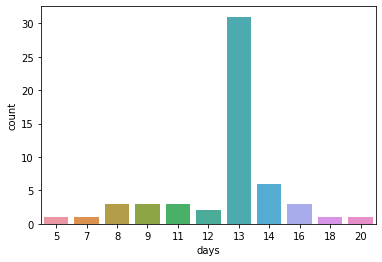

In [4]:
sns.countplot(x=scores['days'])

<AxesSubplot:xlabel='age', ylabel='count'>

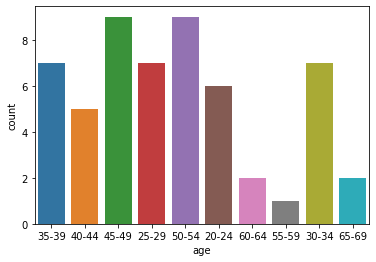

In [7]:
sns.countplot(x=scores['age'])

In [ ]:
sns.countplot(x=scores['edu'])

In [ ]:
# for i in scores.columns[1:]:
#     sns.countplot(x=scores[i])
#     pl.show()

In [10]:
scores['DeltaMADRS']=scores.madrs1-scores.madrs2

In [14]:
df=scores.copy()
df_condition=df[df['number'].str.contains('condition')].copy()
df_control=df[df['number'].str.contains('control')].copy()

In [17]:
df_condition.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,-1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0


In [18]:
df_control.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
23,control_1,8,2,25-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,control_2,20,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
25,control_3,12,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
26,control_4,13,1,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
27,control_5,13,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


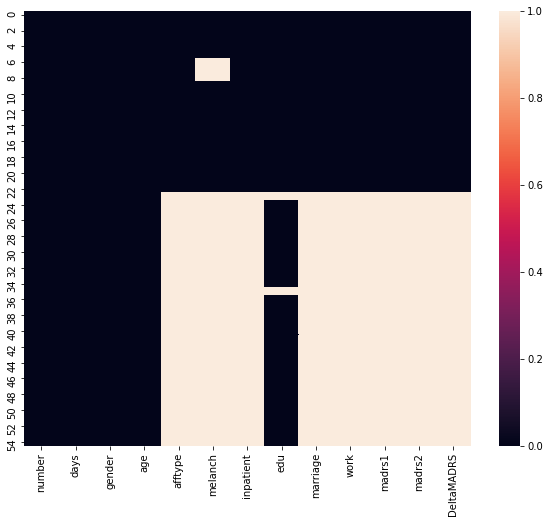

In [28]:
pl.figure(figsize=(10,8))
sns.heatmap(df.isnull())
pl.show()